In [22]:
import numpy as np
import pandas as pd

In [23]:
pip install pgeocode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import warnings
from geopy.distance import geodesic
from sklearn.neighbors import DistanceMetric
from math import radians
from uszipcode import SearchEngine
import sys

In [15]:
from google.colab import files
uploaded = files.upload()

In [16]:
from google.colab import files
uploaded = files.upload()

In [26]:
import io
Crime_22_subset=pd.read_csv('/content/Crime_Updated.csv', encoding_errors= 'replace')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
redeye = pd.read_csv('/content/RedEye_updated.csv', encoding_errors= 'replace')

In [28]:
Crime_22_subset.head()

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,geometry
0,PLTEST005,BURGLARY - RESIDENTIAL,B2,1,13-10-2021 00:00,2021,10,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
1,PLTEST003,INVESTIGATE PROPERTY,B2,0,12-05-2021 00:00,2021,5,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
2,PLTEST002,INVESTIGATE PROPERTY,B2,0,12-05-2021 00:00,2021,5,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
3,PLTEST001,INVESTIGATE PROPERTY,B2,0,29-03-2021 00:00,2021,3,Monday,0,SCHROEDER PLAZA,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
4,312030979,PROPERTY - LOST/ MISSING,E13,0,22-03-2021 00:00,2021,3,Monday,0,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)",POINT (-71.09137369 42.28482577)


In [21]:
#Crime_22.drop(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'UCR_PART','REPORTING_AREA'], axis=1, inplace=True)


KeyError: ignored

In [ ]:

#Crime_22_subset = Crime_22

In [29]:
Crime_22_subset.head()


,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,geometry
0,PLTEST005,BURGLARY - RESIDENTIAL,B2,1,13-10-2021 00:00,2021,10,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
1,PLTEST003,INVESTIGATE PROPERTY,B2,0,12-05-2021 00:00,2021,5,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
2,PLTEST002,INVESTIGATE PROPERTY,B2,0,12-05-2021 00:00,2021,5,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
3,PLTEST001,INVESTIGATE PROPERTY,B2,0,29-03-2021 00:00,2021,3,Monday,0,SCHROEDER PLAZA,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)",POINT (-71.09187755 42.33367922)
4,312030979,PROPERTY - LOST/ MISSING,E13,0,22-03-2021 00:00,2021,3,Monday,0,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)",POINT (-71.09137369 42.28482577)


In [ ]:
#Crime_22_subset.sort_values("OFFENSE_DESCRIPTION")

In [ ]:
#redeye['4. What is your zip code?'] = redeye['4. What is your zip code?'].astype(int)


In [ ]:

#redeye.rename(columns = {'4. What is your zip code?':'zipcode'}, inplace = True)

In [31]:
BIlat=[]
BIlong=[]
for zipcode in redeye.zipcode:
    engine = SearchEngine()
    zipcode = engine.by_zipcode(zipcode)
    BIlong.append(zipcode.lng) 
    BIlat.append(zipcode.lat)

Exception ignored in: <function SearchEngine.__del__ at 0x7f7f64cca280>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

In [32]:
redeye["Longitude"] = BIlong
redeye["Latitude"] = BIlat

In [33]:
redeye.head()

,Timestamp,1. Have you heard of the RedEye service?,"2. If yes, have you ever used the RedEye service?",3. What neighborhood do you live in?,zipcode,student,6. What gender do you identify as?,7. How often do you leave campus after 5 pm in a week?,"8. Based on your previous answer, what timeframe(s) do you leave campus? (Ignore if you answered ""0"" for the previous question)",Which mode of transportation do you use to leave campus after 5 pm?,"From 1 to 5, rate how safe do you feel commuting home during the night?",Is your commute at night from campus impacted due to your area of residence ?,"If yes, would it help if the RedEye service cater to your area?",Longitude,Latitude,geometry
0,2022/11/08 3:24:15 PM EST,Yes,Yes,Roxbury,2119,Graduate student,Female,3 times,11 pm - 1 am,Other,2,NaN,NaN,-71.09,42.32,POINT (-71.09 42.32)
1,2022/11/08 3:28:45 PM EST,Yes,Yes,Roxbury Crossing,2120,Graduate student,Male,4 times,8 pm - 11 pm,Walking,4,No,Yes,-71.10,42.33,POINT (-71.1 42.33)
2,2022/11/08 3:41:02 PM EST,Yes,No,Malden,2148,Graduate student,Female,2 times,5 pm - 8 pm,MBTA,4,No,Yes,-71.05,42.43,POINT (-71.05 42.43)
3,2022/11/08 3:50:53 PM EST,Yes,Yes,South End,2118,Graduate student,Female,1 time,5 pm - 8 pm,Walking,4,No,NaN,-71.07,42.34,POINT (-71.07 42.34)
4,2022/11/08 3:56:14 PM EST,No,No,Back bay,2115,Graduate student,Female,4 times,1am - 4am,Walking,3,Yes,Yes,-71.10,42.34,POINT (-71.1 42.34)


In [30]:
Crime_22_subset[['Lat','Long']]

,Lat,Long
0,42.333679,-71.091878
1,42.333679,-71.091878
2,42.333679,-71.091878
3,42.333679,-71.091878
4,42.284826,-71.091374
...,...,...
68827,42.307289,-71.058499
68828,42.333679,-71.091878
68829,42.283902,-71.130863
68830,42.333951,-71.075389


In [ ]:
# for i in range(len(Crime_22_subset)):
#   if int(Crime_22_subset['Lat'][i]) == 0:
#       Crime_22_subset.drop([i],axis = 0 , inplace = True)

In [ ]:
#redeye.rename(columns = {'5. What type of student are you?':'student'}, inplace = True)

In [ ]:
Mindistance=[]
Min=[]
for person,long1,lat1 in zip(redeye["student"],redeye["Longitude"],redeye["Latitude"]): 
    a = lat1, long1
    distances = []
    for offense,long2,lat2 in zip(Crime_22_subset["OFFENSE_DESCRIPTION"],Crime_22_subset["Long"],Crime_22_subset["Lat"]): 
        b = lat2, long2
        distances.append(geodesic(a, b).miles)
    min_distance = min(distances)
    min_index = distances.index(min_distance)
      
    Mindistance.append(min_distance)
    Min.append(Crime_22_subset["OFFENSE_DESCRIPTION"].iloc[min_index])

    print(Crime_22_subset['OFFENSE_DESCRIPTION'].iloc[min_index],"is nearest to", person , "and", min_distance, "miles", "away from him/her")

In [ ]:
len(Mindistance)

In [ ]:
!unzip Boston_Neighborhoods.zip

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [35]:
street_map = gpd.read_file("Boston_Neighborhoods.shp")

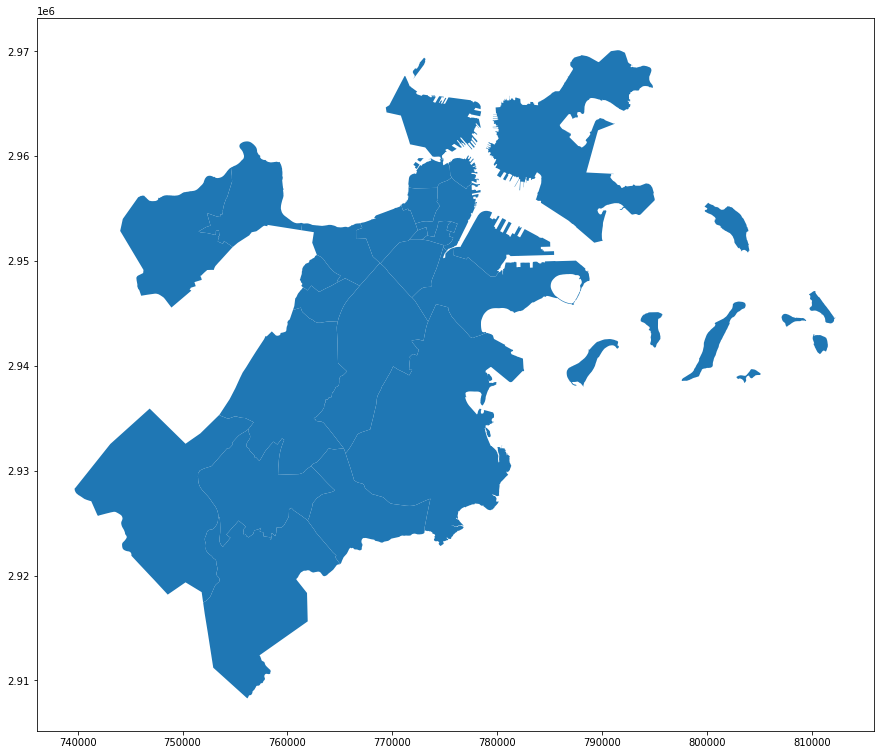

In [36]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax= ax)

In [37]:
geometry = [Point (xy) for xy in zip(redeye['Longitude'],redeye['Latitude'])]

In [38]:
Crime_22_subset.to_csv('Crime_Updated.csv',index = False)

In [39]:
crime_geometry = [Point (xy) for xy in zip(Crime_22_subset['Long'],Crime_22_subset["Lat"])]

In [40]:
crs = {"init": "epsg:4326"}

In [41]:
geo_crime_df = gpd.GeoDataFrame(Crime_22_subset, crs=crs,geometry = crime_geometry)

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [42]:
geo_df = gpd.GeoDataFrame(redeye,crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Timestamp,1. Have you heard of the RedEye service?,"2. If yes, have you ever used the RedEye service?",3. What neighborhood do you live in?,zipcode,student,6. What gender do you identify as?,7. How often do you leave campus after 5 pm in a week?,"8. Based on your previous answer, what timeframe(s) do you leave campus? (Ignore if you answered ""0"" for the previous question)",Which mode of transportation do you use to leave campus after 5 pm?,"From 1 to 5, rate how safe do you feel commuting home during the night?",Is your commute at night from campus impacted due to your area of residence ?,"If yes, would it help if the RedEye service cater to your area?",Longitude,Latitude,geometry
0,2022/11/08 3:24:15 PM EST,Yes,Yes,Roxbury,2119,Graduate student,Female,3 times,11 pm - 1 am,Other,2,NaN,NaN,-71.09,42.32,POINT (-71.09000 42.32000)
1,2022/11/08 3:28:45 PM EST,Yes,Yes,Roxbury Crossing,2120,Graduate student,Male,4 times,8 pm - 11 pm,Walking,4,No,Yes,-71.10,42.33,POINT (-71.10000 42.33000)
2,2022/11/08 3:41:02 PM EST,Yes,No,Malden,2148,Graduate student,Female,2 times,5 pm - 8 pm,MBTA,4,No,Yes,-71.05,42.43,POINT (-71.05000 42.43000)
3,2022/11/08 3:50:53 PM EST,Yes,Yes,South End,2118,Graduate student,Female,1 time,5 pm - 8 pm,Walking,4,No,NaN,-71.07,42.34,POINT (-71.07000 42.34000)
4,2022/11/08 3:56:14 PM EST,No,No,Back bay,2115,Graduate student,Female,4 times,1am - 4am,Walking,3,Yes,Yes,-71.10,42.34,POINT (-71.10000 42.34000)


In [76]:
redeyesubset =redeye["3. What neighborhood do you live in?"]
vc=pd.DataFrame(redeyesubset.value_counts())
vc

,3. What neighborhood do you live in?
Fenway,7
Mission hill,6
Brighton,5
Mission Hill,4
Roxbury Crossing,4
...,...
North Station,1
1575 Tremont Street,1
St. Alphonsus street,1
South End,1


In [43]:
s = gpd.GeoSeries(
    [
        Point( -71.0881,42.3386),
        
    ]
)

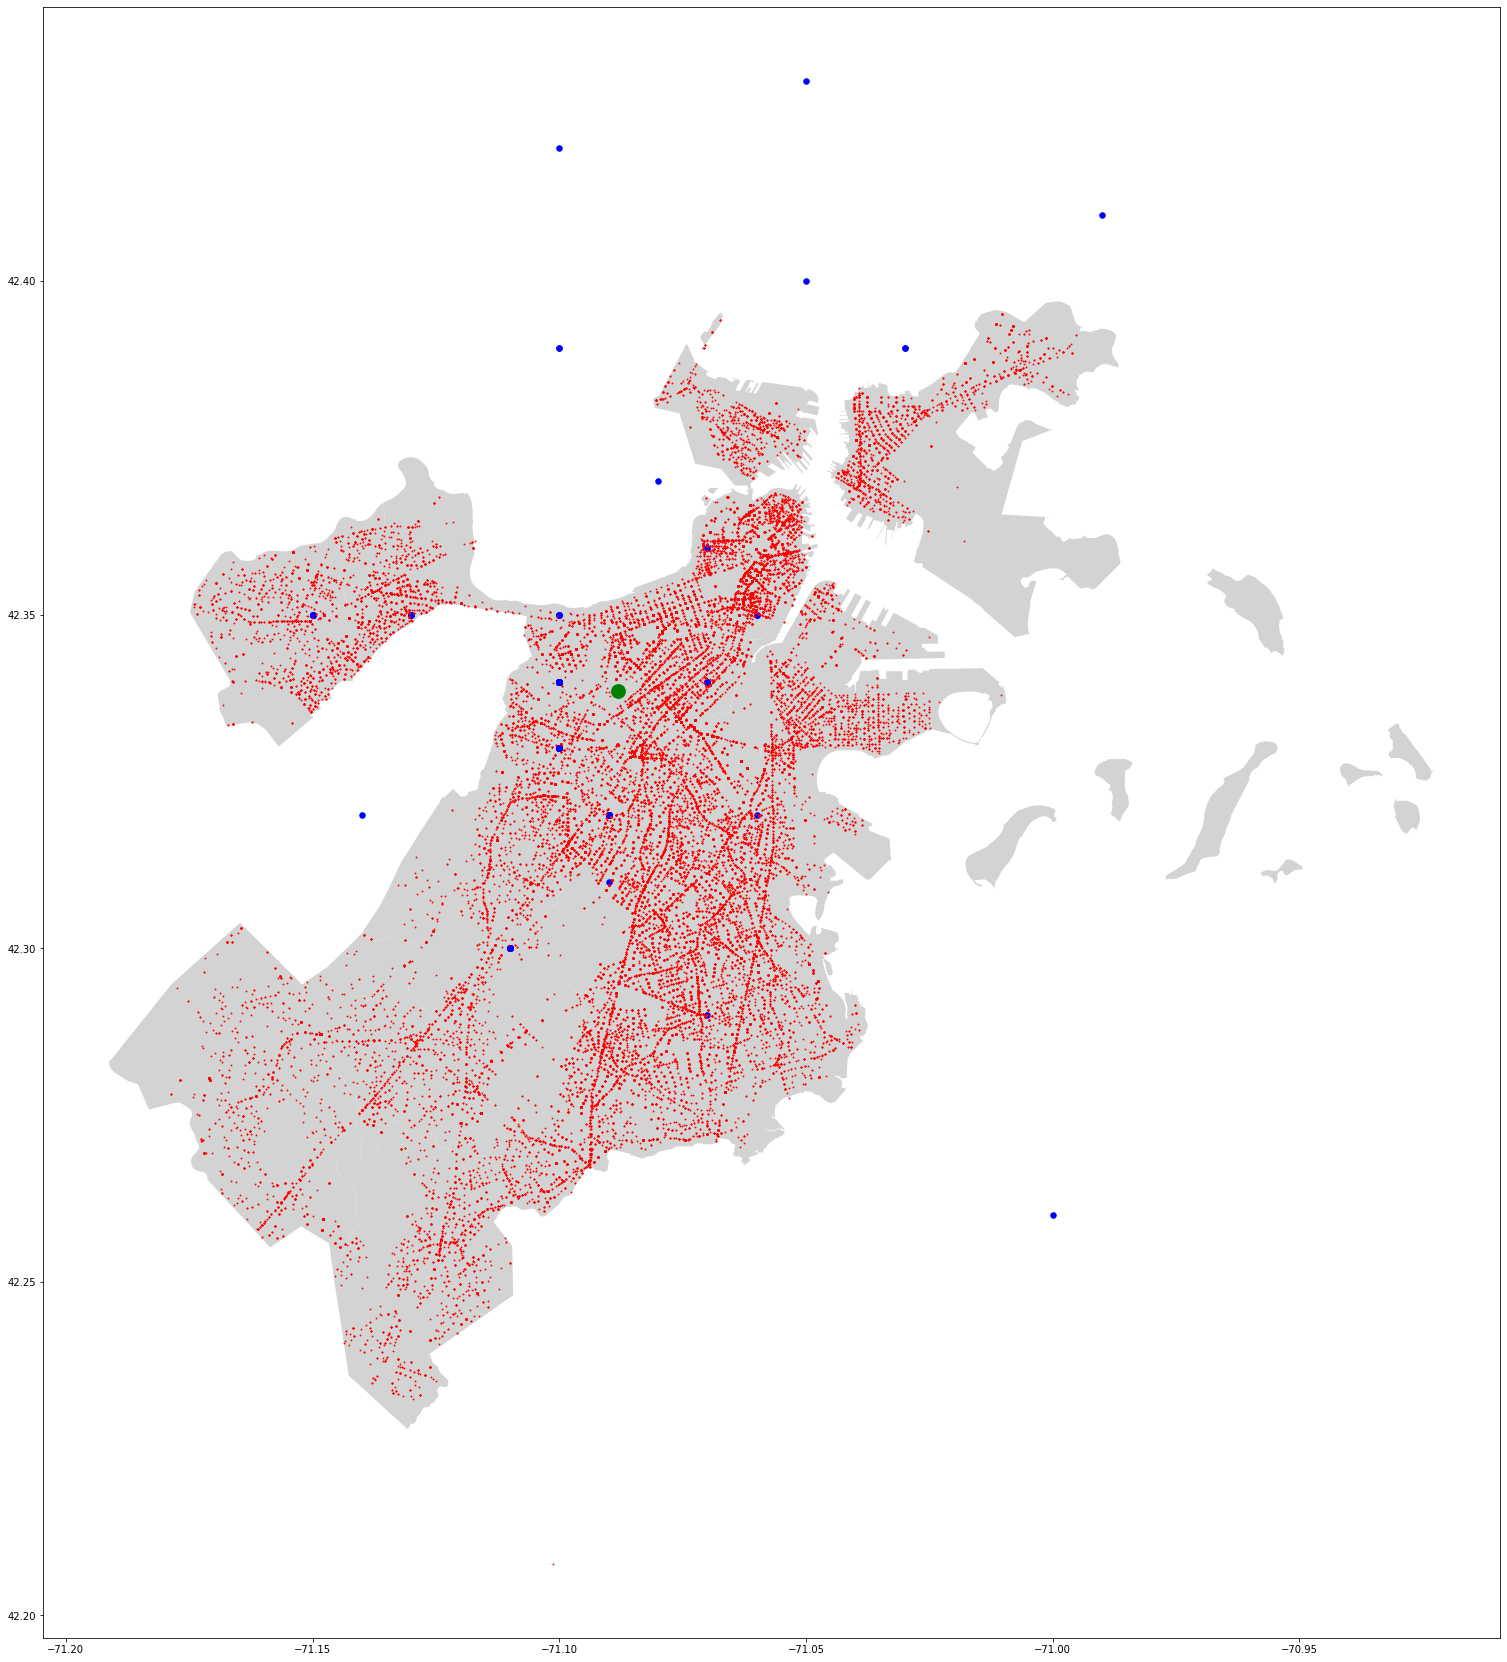

In [48]:
fig,ax  = plt.subplots(figsize = (30,30))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
s.buffer(100)
s.plot(ax=ax, markersize = 190, color='green')
geo_df.plot(ax=ax,markersize = 30, color = 'blue')
geo_crime_df.plot(ax = ax,markersize = 0.7, color = 'red')
# plt.legend(prop = {size})

In [ ]:
# Crime_22_subset.drop([0],axis = 0 , inplace = True)
# Crime_22_subset